In [38]:
from FADS_SRP.input import get_dsets_
import tensorflow as tf
import numpy as np

X_train = dset["X_train"].reshape(dset["X_train"].shape[0], dset["X_train"].shape[1], 1)

In [155]:
dset = get_dsets_("/home/shussain/Simulated_data/29062021/0.5/simulation_output1/PS/output/")

In [156]:
from sklearn.decomposition import PCA

pca = PCA(2)
pcs = pca.fit_transform(dset["X_train"])

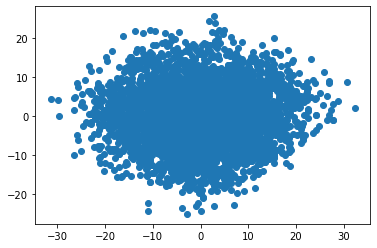

In [157]:
plt.scatter(pcs[:, 0], pcs[:, 1])

In [143]:
Input = tf.keras.Input((1000, 1))
conv = tf.keras.layers.Conv1D(1, 70, 5)(Input)
conv = tf.keras.layers.Flatten(name="regions")(conv)
clf = tf.keras.layers.Dense(2, activation="sigmoid")(conv)
model = tf.keras.Model(inputs=Input, outputs=clf)

In [144]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.AUC()])
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 1000, 1)]         0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 187, 1)            71        
_________________________________________________________________
regions (Flatten)            (None, 187)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 376       
Total params: 447
Trainable params: 447
Non-trainable params: 0
_________________________________________________________________


In [138]:
hist = model.fit(
    x=X_train,
    y=dset["y_train"],
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
12/12 [==============================] - 0s 36ms/step - loss: 0.8185 - auc_10: 0.4915 - val_loss: 0.7789 - val_auc_10: 0.4856
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7595 - auc_10: 0.4999 - val_loss: 0.7704 - val_auc_10: 0.4871
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 0.7532 - auc_10: 0.5079 - val_loss: 0.7606 - val_auc_10: 0.4960
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7419 - auc_10: 0.5156 - val_loss: 0.7534 - val_auc_10: 0.5005
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7334 - auc_10: 0.5277 - val_loss: 0.7448 - val_auc_10: 0.5056
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7266 - auc_10: 0.5354 - val_loss: 0.7381 - val_auc_10: 0.5123
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7180 - auc_10: 0.5456 - val_loss: 0.7338 - val_auc_10: 0.5182
Epoch 8/100
12/12 [=====================

In [139]:
regions = tf.keras.Model(inputs=Input, outputs=model.get_layer("regions").output)
regions(X_train)

<tf.Tensor: shape=(480, 99), dtype=float32, numpy=
array([[2.786003  , 2.1320984 , 1.7281817 , ..., 1.950046  , 1.3351079 ,
        2.7784753 ],
       [2.1127396 , 1.9483985 , 2.3664298 , ..., 2.5393002 , 1.9483985 ,
        2.330223  ],
       [1.7384248 , 0.62124383, 1.0896962 , ..., 2.3826559 , 2.2240531 ,
        1.2491345 ],
       ...,
       [2.7634516 , 2.1320984 , 1.691975  , ..., 1.2044759 , 1.4452294 ,
        1.0391947 ],
       [1.9712576 , 1.5665901 , 1.7898191 , ..., 1.7010695 , 2.3187184 ,
        1.512418  ],
       [2.2782001 , 1.3454415 , 1.2210611 , ..., 1.1178982 , 0.11894715,
        0.50904524]], dtype=float32)>

In [116]:
from tqdm.auto import tqdm, trange
from statsmodels.api import Logit, tools
from functools import partial

def logit_pvals(X, y):
    out = []
    #P = Pool(int(cpu_count()/2 - 1))
    pvals_iterable = map(partial(single_pval, X=X, y=y), range(X.shape[1]))

    with tqdm(total = X.shape[1], desc="generating p values") as pbar:
        for p_val in pvals_iterable:
            out.append(p_val)
            pbar.update()

    #P.close()
    #P.join()
    return out

def single_pval(i, X, y):
    lr = Logit(y, tools.add_constant(X[:, i])).fit(disp=0, method="bfgs") 
    pvals = lr.pvalues
    if len(pvals) != 2:
        p = 1
    else:
        p = pvals[1]
    return p if not p == 0 else 1e-100

In [140]:
X=regions(X_train).numpy()
p=logit_pvals(X, dset["y_train"][:, 1])

generating p values:   0%|          | 0/99 [00:00<?, ?it/s]

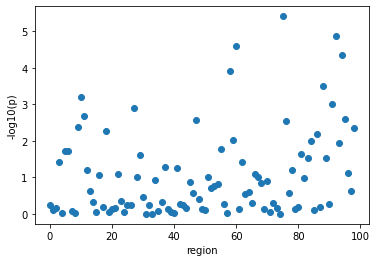

In [142]:
plt.scatter(list(range(99)), -np.log10(p))
plt.ylabel("-log10(p)")
plt.xlabel("region")
plt.savefig("reg.jpeg")

In [92]:
weights = model.layers[-1].weights[0].numpy()

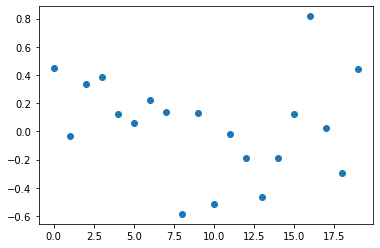

In [81]:
plt.scatter(list(range(20)), model.layers[0].weights[0].numpy().ravel())

In [83]:
weights.shape

(191, 2)

In [62]:
len(x)

192

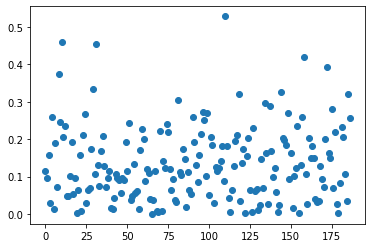

In [93]:
import matplotlib.pyplot as plt

x=list(range(187))
plt.scatter(x, np.abs(weights[:, 0]))

ValueError: x and y must be the same size

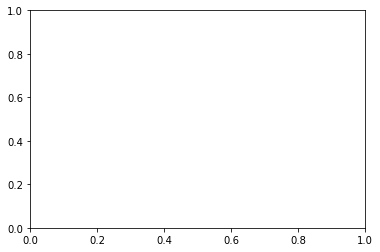

In [94]:
x=list(range(197))
plt.scatter(x, np.abs(weights[:, 1]))

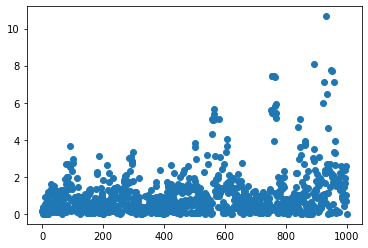

In [68]:
plt.scatter(list(range(1000)), -np.log10(dset["ct"]["logistic_p"]))